## Load Essentials

In [ ]:
!gdown --id 1cg0b_Eq7QQpbWX_6X3KSeDBFJLF1DCy6

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cg0b_Eq7QQpbWX_6X3KSeDBFJLF1DCy6
To: /kaggle/working/SolaimanLipi.zip
100%|█████████████████████████████████████████| 328k/328k [00:00<00:00, 111MB/s]


In [ ]:
!unzip /kaggle/working/SolaimanLipi.zip

Archive:  /kaggle/working/SolaimanLipi.zip
ধন্যবাদ.txt:  mismatching "local" filename (ржзржирзНржпржмрж╛ржж.txt),
         continuing with "central" filename version
  inflating: ধন্যবাদ.txt  
  inflating: SolaimanLipi_Bold_10-03-12.ttf  
  inflating: SolaimanLipi_22-02-2012.ttf  


In [ ]:
!mv /kaggle/working/SolaimanLipi_22-02-2012.ttf  /usr/share/fonts/truetype/SolaimanLipi.ttf

In [ ]:
!fc-cache -fv

/usr/share/fonts: caching, new cache contents: 0 fonts, 6 dirs
/usr/share/fonts/X11: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/X11/encodings: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/X11/encodings/large: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/X11/misc: caching, new cache contents: 89 fonts, 0 dirs
/usr/share/fonts/X11/util: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cMap: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/cmap/adobe-cns1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-gb1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan2: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-korea1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/opentype: ca

In [ ]:
!fc-list | grep "SolaimanLipi"

/usr/share/fonts/truetype/SolaimanLipi.ttf: SolaimanLipi:style=Normal


## Load Daatset

In [ ]:
!gdown --id 1_rAczD0fBG7yotODVh8RevAPXZ2WLzK8

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_rAczD0fBG7yotODVh8RevAPXZ2WLzK8
To: /kaggle/working/CSE475_Assingment2.zip
100%|██████████████████████████████████████| 2.96M/2.96M [00:00<00:00, 21.5MB/s]


In [ ]:
!unzip /kaggle/working/CSE475_Assingment2.zip

Archive:  /kaggle/working/CSE475_Assingment2.zip
   creating: CSE475_Assingment2/
  inflating: CSE475_Assingment2/dataset.csv  


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
dt = pd.read_csv("/kaggle/working/CSE475_Assingment2/dataset.csv")

In [ ]:
dt.head()

Rating                                             Review  \
0     5.0  অসাধারণ ফোন।অনেক পছন্দ হয়েছে।একদম অথেনটিক শাও...   
1     5.0  Phone is good according to my uses, Upgraded f...   
2     5.0                  অল্প দামে দারুন একটা স্মার্টফোন 💙   
3     5.0            Super Fast Delivery ,11200 TK te pailam   
4     5.0                    Delay Delivery... Good Product.   

          Product Name Product Category Emotion Data Source Sentiment  
0  Redmi 12C (4/128GB)     Smart Phones   Happy       Daraz  Positive  
1  Redmi 12C (4/128GB)     Smart Phones   Happy       Daraz  Positive  
2  Redmi 12C (4/128GB)     Smart Phones    Love       Daraz  Positive  
3  Redmi 12C (4/128GB)     Smart Phones   Happy       Daraz  Positive  
4  Redmi 12C (4/128GB)     Smart Phones   Happy       Daraz  Positive

**Inspect for missing values and class imbalance.**


Missing values per column:
Rating              0
Review              0
Product Name        0
Product Category    0
Emotion             0
Data Source         0
Sentiment           0
dtype: int64


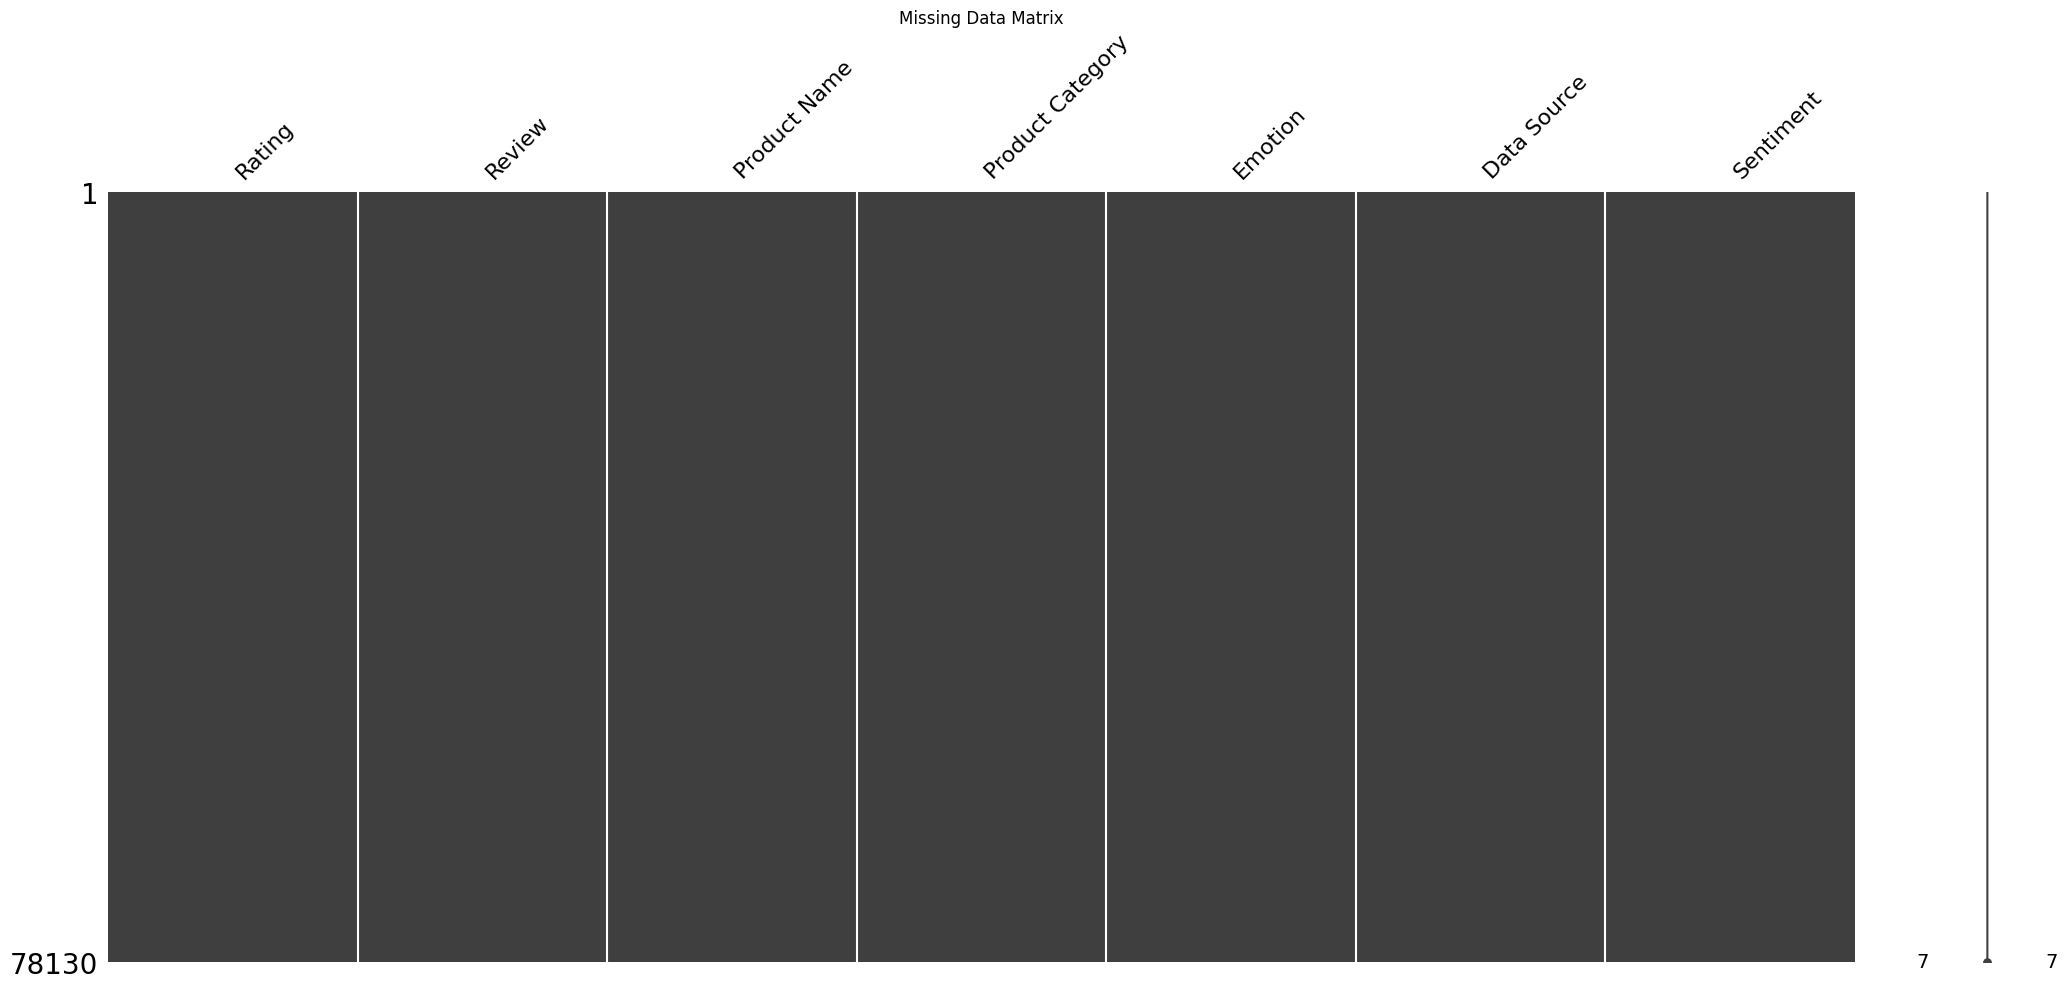

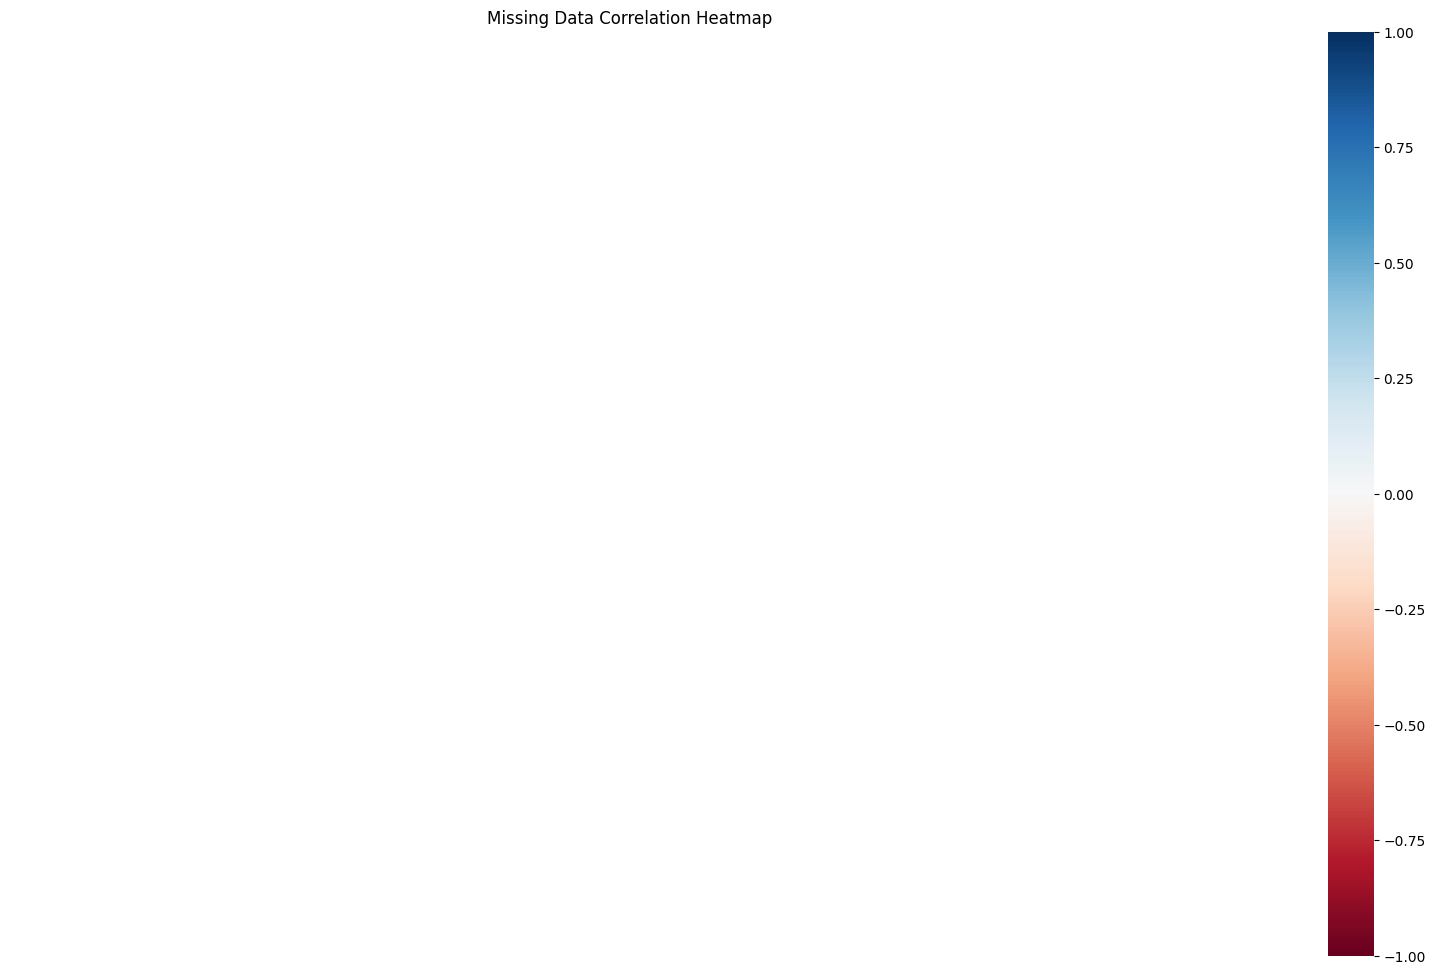

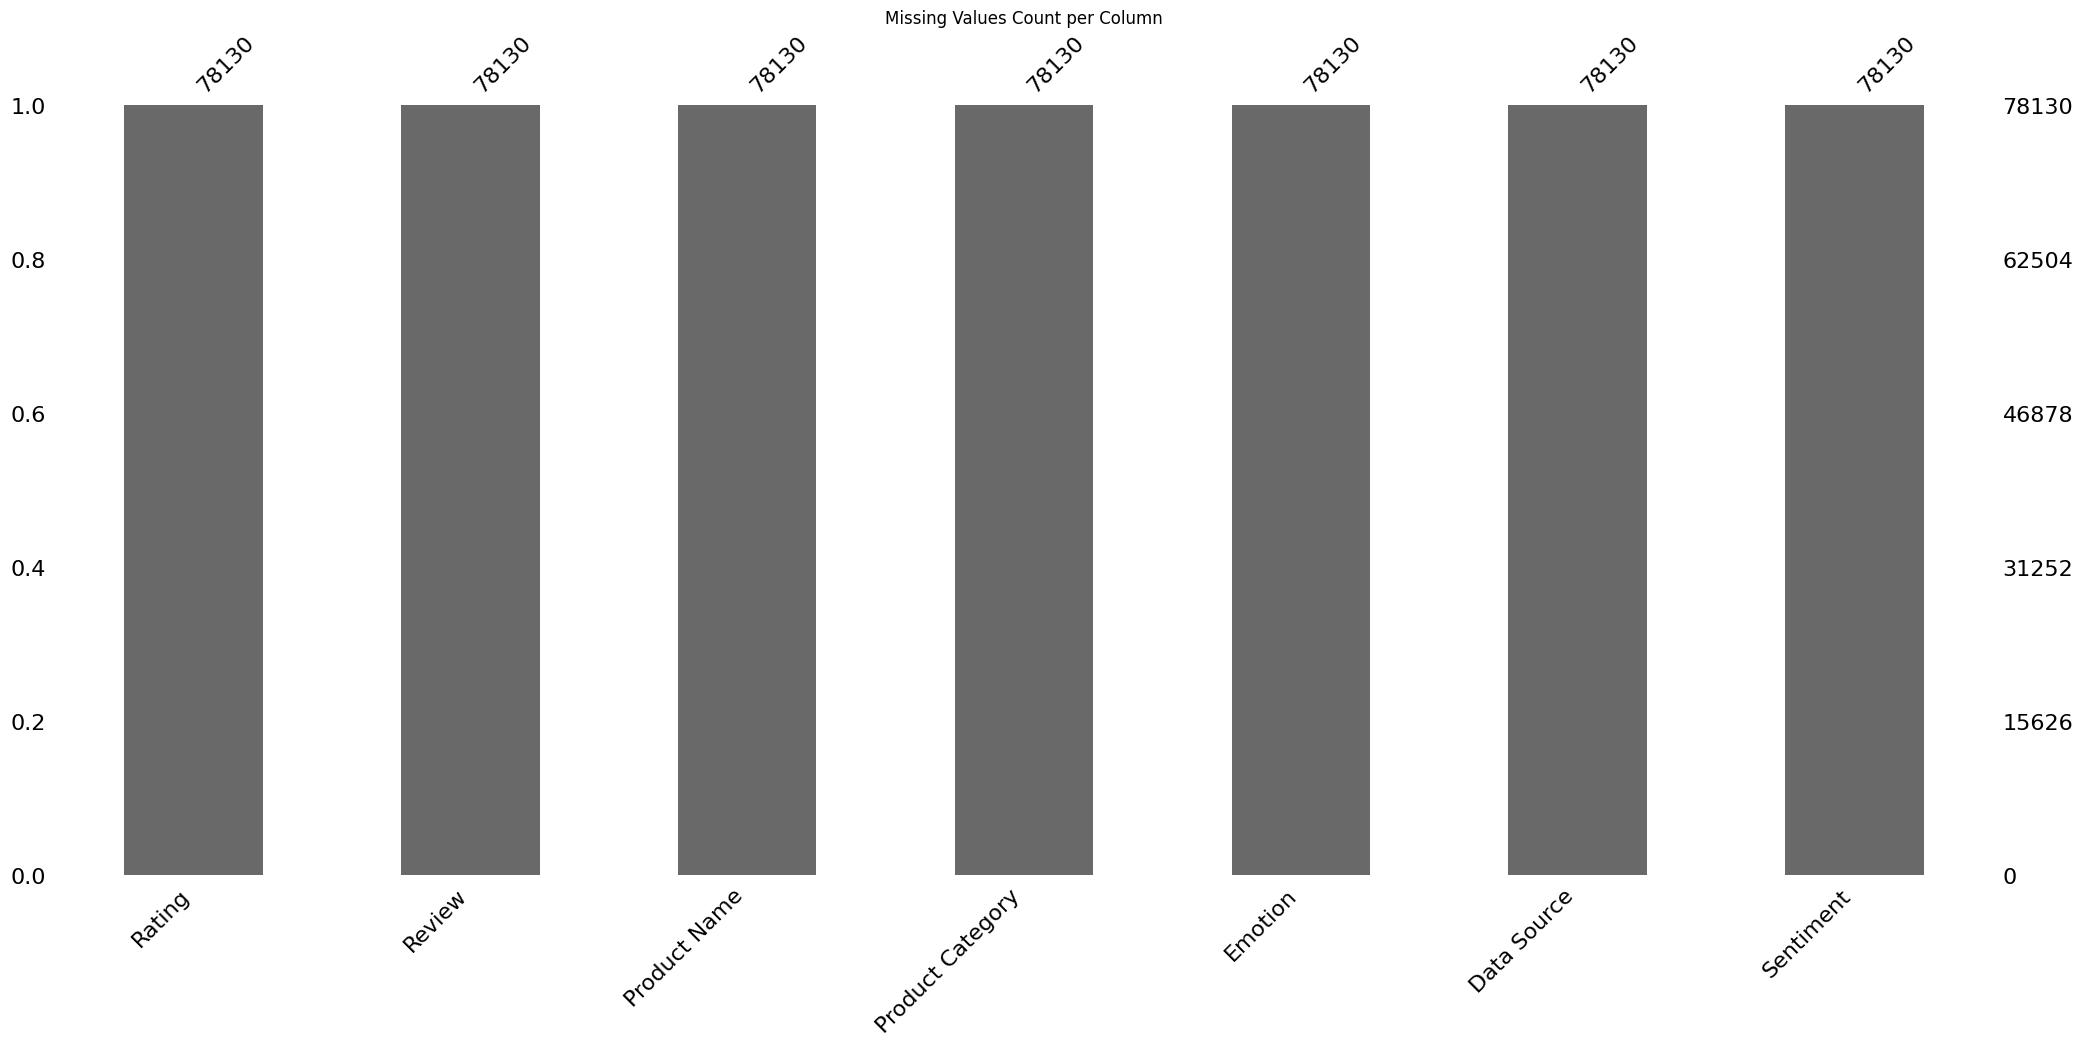

In [ ]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt



# Show basic info
print("Missing values per column:")
print(dt.isnull().sum())

# Visualize missing data matrix
msno.matrix(dt)
plt.title("Missing Data Matrix")
plt.show()

# Visualize missing data heatmap
msno.heatmap(dt)
plt.title("Missing Data Correlation Heatmap")
plt.show()

# Visualize missing data as a bar chart
msno.bar(dt)
plt.title("Missing Values Count per Column")
plt.show()


In [ ]:
missing_summary = dt.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
missing_percent = (missing_summary / len(dt)) * 100

summary_df = pd.DataFrame({
    'Missing Count': missing_summary,
    'Missing Percentage (%)': missing_percent.round(2)
})

print(summary_df)



Empty DataFrame
Columns: [Missing Count, Missing Percentage (%)]
Index: []


## **EDA**

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


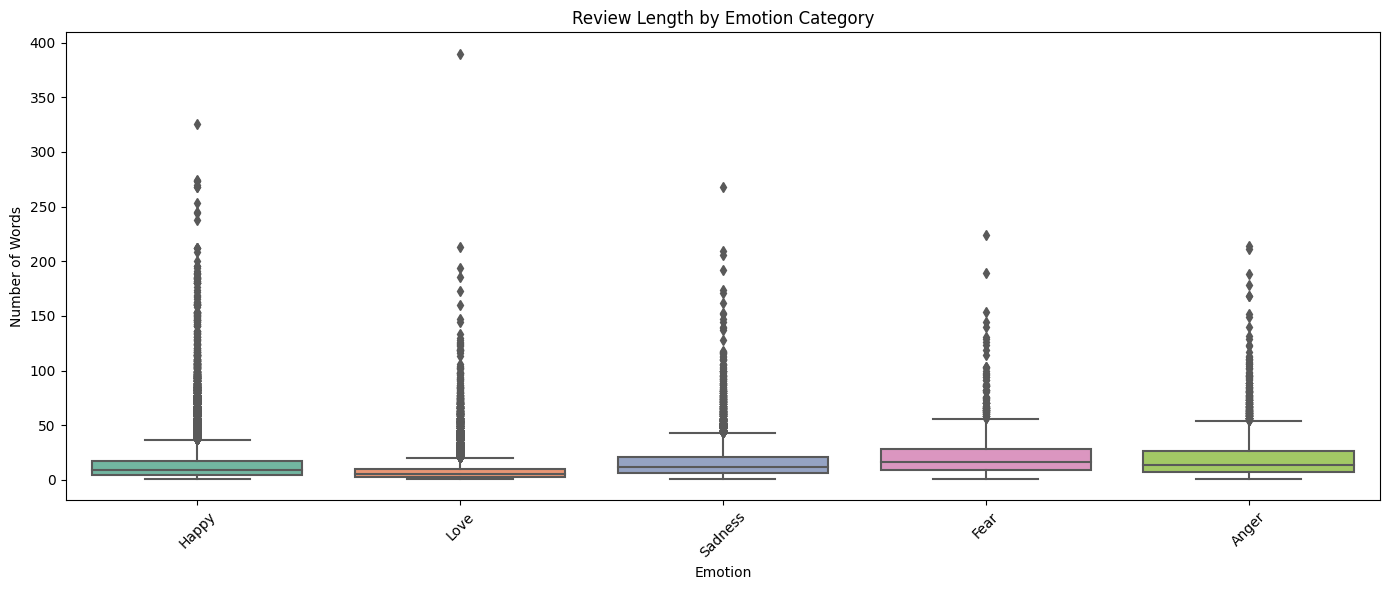

In [ ]:
import nltk

# Download the necessary Punkt data for sentence tokenization
nltk.download('punkt')
nltk.download('punkt_tab')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer


# Make sure Review column is string
dt['Review'] = dt['Review'].astype(str)

# Compute review lengths safely
dt['review_length'] = dt['Review'].apply(lambda x: len(nltk.word_tokenize(x)))

# === Plot review length distribution by Emotion ===
plt.figure(figsize=(14, 6))
sns.boxplot(x='Emotion', y='review_length', data=dt, palette='Set2')
plt.title('Review Length by Emotion Category')
plt.xlabel('Emotion')
plt.ylabel('Number of Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Function to get top n-grams from a given text series
def get_top_ngrams(corpus, n=None, ngram_range=(2, 2)):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

# Top bigrams and trigrams by Emotion
emotion_groups = dt['Emotion'].unique()
for emotion in emotion_groups:
    print(f"\nEmotion: {emotion}")
    subset = dt[dt['Emotion'] == emotion]['Review'].dropna()
    bigrams = get_top_ngrams(subset, n=5, ngram_range=(2, 2))
    trigrams = get_top_ngrams(subset, n=5, ngram_range=(3, 3))
    print("Top Bigrams:", bigrams)
    print("Top Trigrams:", trigrams)



Emotion: Happy
Top Bigrams: [('ধন যব', 5351), ('good product', 3108), ('আলহ মদ', 2221), ('the product', 1381), ('thank you', 1368)]
Top Trigrams: [('অন ধন যব', 659), ('ধন যব এব', 443), ('ধন যব রক', 408), ('the product is', 356), ('is very good', 342)]

Emotion: Love
Top Bigrams: [('ধন যব', 1471), ('very good', 1423), ('good product', 1337), ('অস রণ', 734), ('thank you', 573)]
Top Trigrams: [('very good product', 519), ('এক কথ অস', 250), ('কথ অস রণ', 220), ('অন ধন যব', 187), ('same as picture', 152)]

Emotion: Sadness
Top Bigrams: [('is not', 170), ('not good', 134), ('the product', 124), ('আশ কর', 123), ('good but', 121)]
Top Trigrams: [('not so good', 46), ('is not good', 38), ('is good but', 36), ('product is good', 32), ('quality is not', 30)]

Emotion: Fear
Top Bigrams: [('যবহ কর', 36), ('the product', 34), ('is not', 31), ('অর কর', 30), ('it is', 26)]
Top Trigrams: [('the product is', 11), ('don buy this', 10), ('যবহ কর পর', 9), ('quality is not', 7), ('is good but', 7)]

Emotion

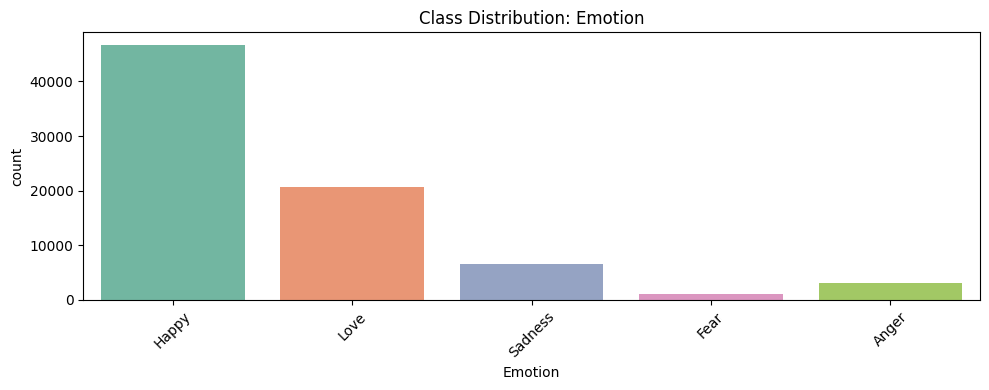

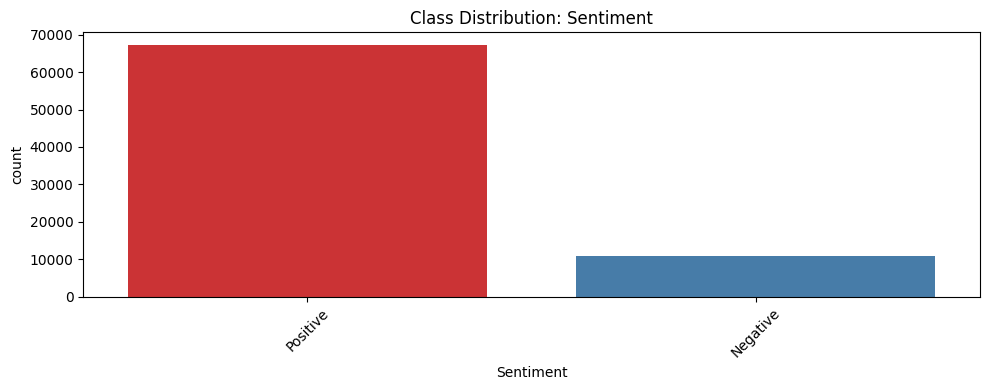

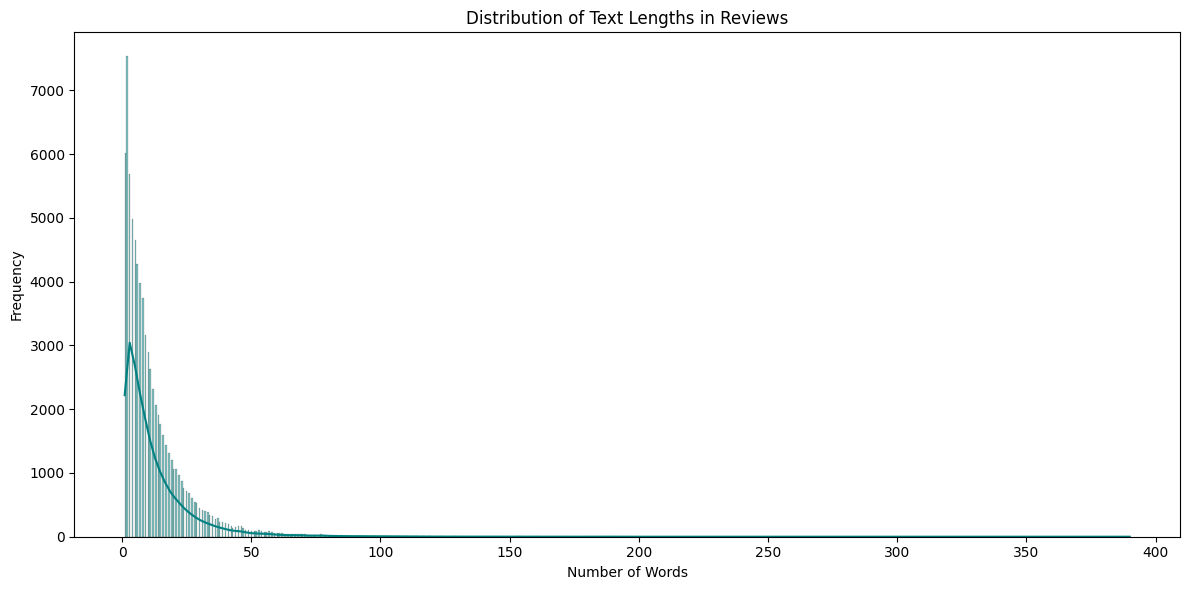

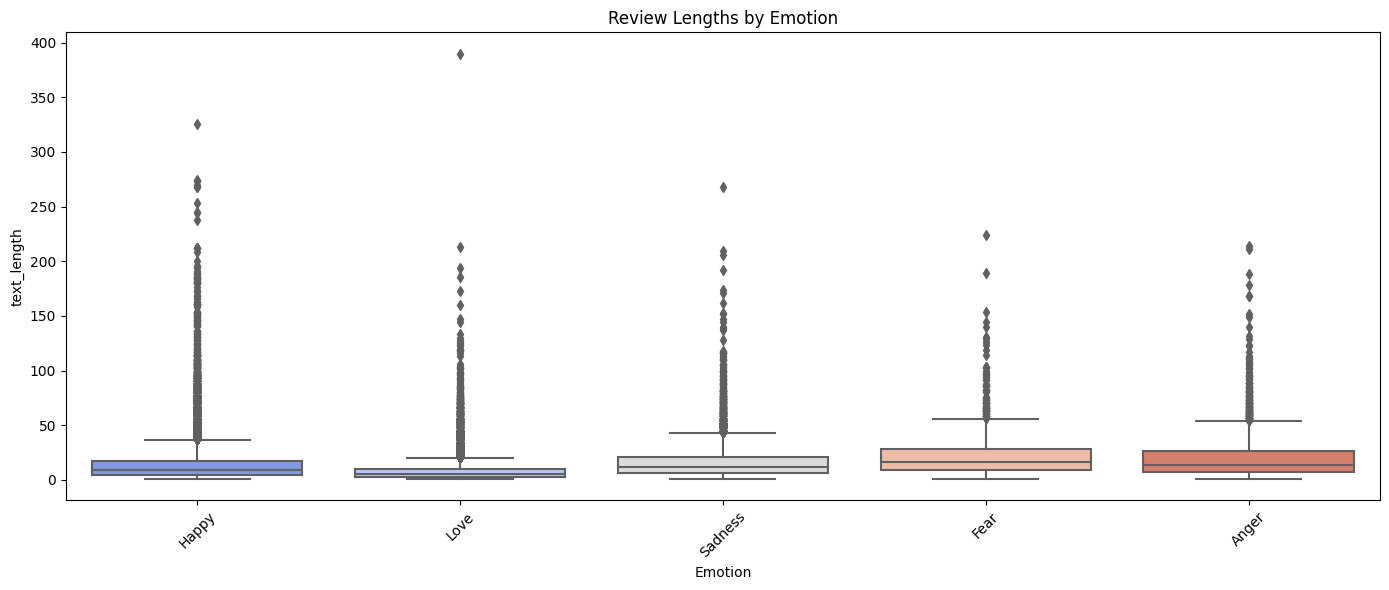

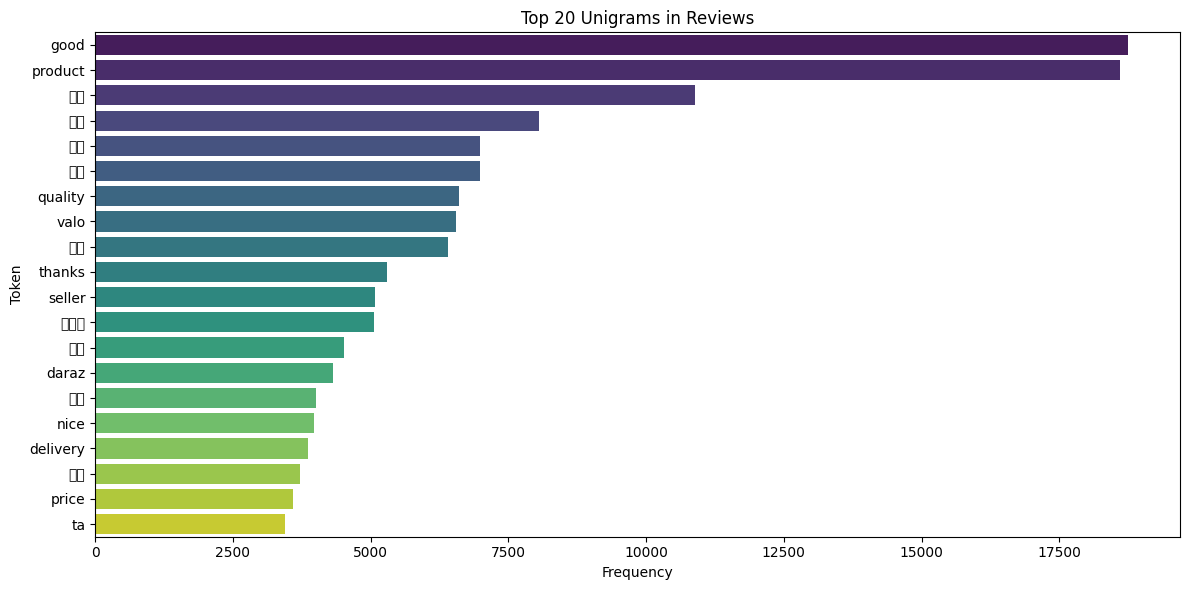

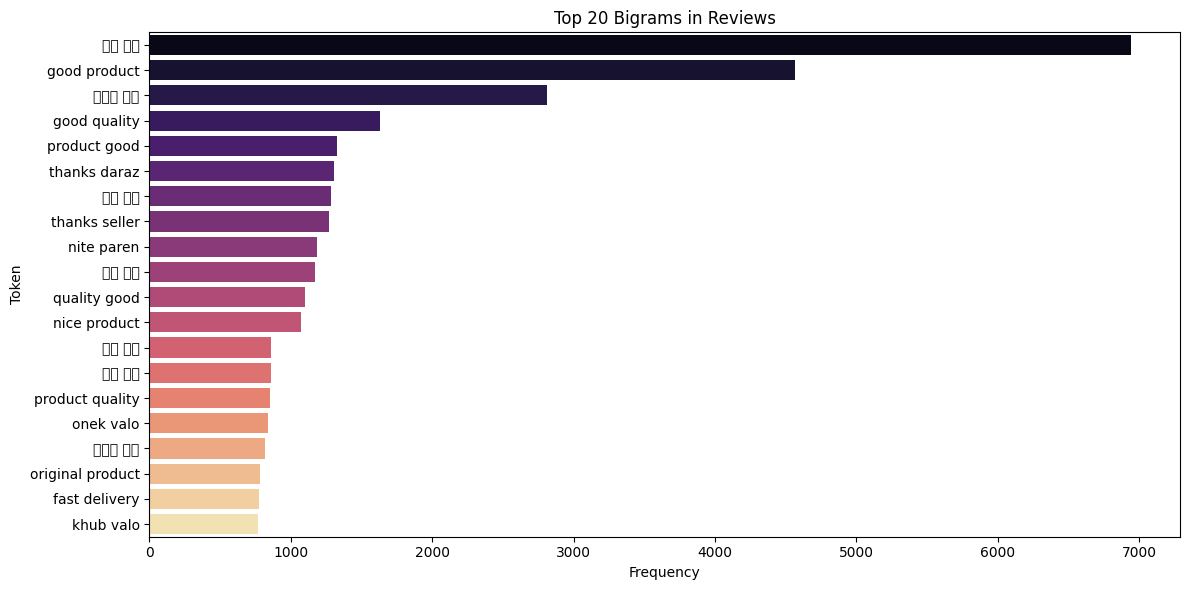

In [ ]:

# Ensure text is string
dt['Review'] = dt['Review'].astype(str)

# ========== 1. CLASS DISTRIBUTION ==========
plt.figure(figsize=(10, 4))
sns.countplot(data=dt, x='Emotion', palette='Set2')
plt.title('Class Distribution: Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(data=dt, x='Sentiment', palette='Set1')
plt.title('Class Distribution: Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ========== 2. TEXT LENGTH DISTRIBUTION ==========
dt['text_length'] = dt['Review'].apply(lambda x: len(nltk.word_tokenize(x)))

plt.figure(figsize=(12, 6))
sns.histplot(dt['text_length'], kde=True, color='teal')
plt.title('Distribution of Text Lengths in Reviews')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='Emotion', y='text_length', data=dt, palette='coolwarm')
plt.title('Review Lengths by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ========== 3. COMMON TOKENS ==========
def get_top_ngrams(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

# Top 20 unigrams and bigrams
top_unigrams = get_top_ngrams(dt['Review'], n=20, ngram_range=(1, 1))
top_bigrams = get_top_ngrams(dt['Review'], n=20, ngram_range=(2, 2))

# Plot unigrams
unigrams_df = pd.DataFrame(top_unigrams, columns=['Token', 'Frequency'])
plt.figure(figsize=(12, 6))
sns.barplot(data=unigrams_df, x='Frequency', y='Token', palette='viridis')
plt.title('Top 20 Unigrams in Reviews')
plt.tight_layout()
plt.show()

# Plot bigrams
bigrams_df = pd.DataFrame(top_bigrams, columns=['Token', 'Frequency'])
plt.figure(figsize=(12, 6))
sns.barplot(data=bigrams_df, x='Frequency', y='Token', palette='magma')
plt.title('Top 20 Bigrams in Reviews')
plt.tight_layout()
plt.show()


In [ ]:
!apt-get install fonts-solaimanlipi -y
!fc-cache -fv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package fonts-solaimanlipi
/usr/share/fonts: caching, new cache contents: 0 fonts, 6 dirs
/usr/share/fonts/X11: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/X11/encodings: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/X11/encodings/large: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/X11/misc: caching, new cache contents: 89 fonts, 0 dirs
/usr/share/fonts/X11/util: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cMap: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/cmap/adobe-cns1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-gb1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan2: caching, ne

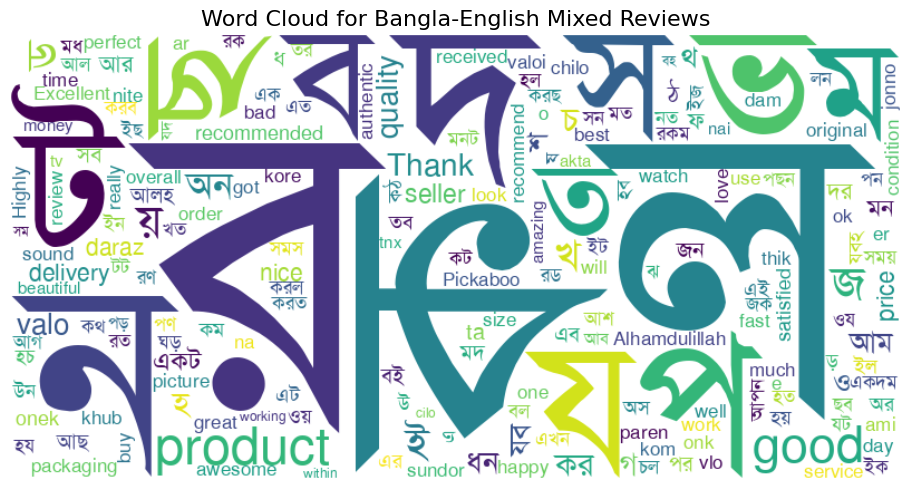

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

# Convert the 'Review' column to strings (if it's not already)
dt['Review'] = dt['Review'].astype(str)

# Concatenate all reviews into a single string
all_reviews = ' '.join(dt['Review'].values)

wordcloud_bangla = WordCloud(
    width=800, height=400, background_color='white',
    collocations=False, font_path='/usr/share/fonts/truetype/SolaimanLipi.ttf'
)

# Generate the word cloud from the concatenated string
wordcloud_bangla.generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_bangla, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Bangla-English Mixed Reviews", fontsize=16)
plt.tight_layout()
plt.show()

## **Prepare Datasets**

In [ ]:
!pip install emoji

In [ ]:
import pandas as pd
import re
import emoji

dt['Review'] = dt['Review'].astype(str)

# Bangla stopwords (your custom list)
stopwords = {
    'অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আছে', 'আত্মা', 'আদ্যভাগে',
    'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উক্ত', 'উনি',
    'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একে', 'একটি', 'একবার', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা',
    'এটাই', 'এটি', 'এত', 'এতটাই', 'এদের', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওদের',
    'ওর', 'ওরা', 'কত', 'কবে', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করানো', 'করায়', 'করি', 'করিয়া', 'করিয়ে',
    'করেছে', 'করেছেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কী', 'কে', 'কেউ',
    'কেউই', 'কেন', 'কখনও', 'কত', 'কয়েক', 'কয়েকটি', 'ক্ষেত্রে', 'খুব', 'গিয়ে', 'গিয়েছে', 'গিয়েছিল', 'গেছে', 'চলে',
    'চান', 'চেয়ে', 'ছাড়া', 'ছাড়াও', 'ছিল', 'ছিলেন', 'জন্য', 'জন্যে', 'জানতে', 'জানায়', 'জানানো', 'জানিয়ে', 'জানি',
    'তখন', 'তবে', 'তবু', 'তাহলে', 'তাহার', 'তাদের', 'তার', 'তারপর', 'তারা', 'তাহা', 'তাকে', 'তাহাতে', 'তুমি',
    'তুলে', 'থাকে', 'থাকেন', 'থাকায়', 'থেকে', 'থেকেই', 'থেকেছে', 'দিই', 'দিয়ে', 'দেন', 'দেখা', 'দেখে',
    'দেয়', 'দেওয়া', 'দেওয়ার', 'ধরা', 'ধরে', 'নয়', 'নাকি', 'নাগাদ', 'নানা', 'নিয়ে', 'নিজে', 'নিজেই',
    'নিজেদের', 'নিজের', 'নতুন', 'নির্বাচিত', 'নীচের', 'নেকি', 'পক্ষে', 'পর', 'পরে', 'পরেই', 'পর্যন্ত', 'পাওয়া', 'পাচ্ছে',
    'পারি', 'পারে', 'পূর্ব', 'প্রতি', 'প্রথম', 'প্রভৃতি', 'প্রযন্ত', 'প্রায়', 'ফের', 'বহু', 'বলা', 'বলতে',
    'বলল', 'বললেন', 'বলে', 'বলেছেন', 'বসে', 'ভাবে', 'ভাবেই', 'মধ্য', 'মধ্যে', 'মাত্র', 'মনে', 'মত', 'মতো',
    'যখন', 'যদি', 'যদিও', 'যা', 'যাকে', 'যাচ্ছে', 'যাতে', 'যেন', 'যে', 'যেতে', 'যায়', 'যারা',
    'যথেষ্ট', 'রাখা', 'রেখে', 'শুধু', 'শুরু', 'সঙ্গে', 'সাধারণ', 'সুতরাং', 'সে', 'সেই', 'সেখানে',
    'স্বয়ং', 'হইতে', 'হইবে', 'হইয়া', 'হওয়া', 'হওয়ার', 'হচ্ছে', 'হবেন', 'হয়ে', 'হয়েছে', 'হয়তো',
    'হল', 'হলে', 'হলেই', 'হলো'
}

# Define patterns
punctuations = r"[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~।]"
digits = r"\d+"
letters = r"[a-zA-Z]"


import emoji
import re

# Short forms (optional)
short_form_dict = {
    "u": "you", "ur": "your", "r": "are", "luv": "love",
    "pls": "please", "thx": "thanks", "btw": "by the way", "idk": "i don’t know"
}

# Define patterns
punctuations = r"[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~।]"
digits = r"\d+"
letters = r"[a-zA-Z]"

def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # Flags
        u"\U00002700-\U000027BF"  # Dingbats
        u"\U0001F900-\U0001F9FF"  # Supplemental symbols
        u"\U00002600-\U000026FF"  # Misc symbols
        u"\U0000200D"             # ZWJ
        u"\U00002300-\U000023FF"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# ✅ Final cleaner that retains English
def clean_text(text):
    text = text.lower()
    text = remove_emojis(text)

    tokens = text.split()
    filtered = []

    for token in tokens:
        # Remove punctuation and digits
        token = re.sub(r"[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~।]", "", token)
        token = re.sub(r"\d+", "", token)

        if token in stopwords or token == "":
            continue

        filtered.append(token)

    return " ".join(filtered)

# Apply to your DataFrame
dt['cleaned_review'] = dt['Review'].astype(str).apply(clean_text)

# Preview
print(dt[['Review', 'cleaned_review']].head())


                                              Review  \
0  অসাধারণ ফোন।অনেক পছন্দ হয়েছে।একদম অথেনটিক শাও...   
1  Phone is good according to my uses, Upgraded f...   
2                  অল্প দামে দারুন একটা স্মার্টফোন 💙   
3            Super Fast Delivery ,11200 TK te pailam   
4                    Delay Delivery... Good Product.   

                                      cleaned_review  
0  অসাধারণ ফোনঅনেক পছন্দ হয়েছেএকদম অথেনটিক শাওমি...  
1  phone is good according to my uses upgraded fr...  
2                    অল্প দামে দারুন একটা স্মার্টফোন  
3                   super fast delivery tk te pailam  
4                        delay delivery good product  


In [ ]:
import nltk
from nltk.corpus import stopwords  # Import the stopwords module

nltk.download('stopwords')

dt['Review'] = dt['Review'].astype(str)

# Bangla stopwords (your list)
bangla_stopwords = { ... }  # (paste your full set here)
english_stopwords = set(stopwords.words('english'))

# Define cleaning + multilingual tokenizer
def multilingual_clean_tokenize(text):
    # Lowercase
    text = text.lower()

    # Remove URLs, punctuation, and digits
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^\w\s\u0980-\u09FFa-zA-Z]", "", text)  # Keep Bangla & English letters
    text = re.sub(r"\d+", "", text)

    # Tokenize by whitespace
    tokens = text.split()

    # Filter out stopwords
    cleaned_tokens = [
        tok for tok in tokens
        if tok not in bangla_stopwords and tok not in english_stopwords
    ]

    return cleaned_tokens

# Apply to the Review column
dt['tokens'] = dt['Review'].apply(multilingual_clean_tokenize)

# View output
print(dt[['Review', 'tokens']].head())

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              Review  \
0  অসাধারণ ফোন।অনেক পছন্দ হয়েছে।একদম অথেনটিক শাও...   
1  Phone is good according to my uses, Upgraded f...   
2                  অল্প দামে দারুন একটা স্মার্টফোন 💙   
3            Super Fast Delivery ,11200 TK te pailam   
4                    Delay Delivery... Good Product.   

                                              tokens  
0  [অসাধারণ, ফোনঅনেক, পছন্দ, হয়েছেএকদম, অথেনটিক,...  
1  [phone, good, according, uses, upgraded, realm...  
2              [অল্প, দামে, দারুন, একটা, স্মার্টফোন]  
3            [super, fast, delivery, tk, te, pailam]  
4                   [delay, delivery, good, product]  


In [ ]:

output_df = dt[['Review', 'tokens']]

# Save to CSV
output_df.to_csv('dt_with_tokens.csv', index=False)

print("✅ Exported successfully to dt_with_tokens.csv")


✅ Exported successfully to dt_with_tokens.csv


### **Train/Val/Test split: 70% / 10% / 20%.**

In [ ]:
from sklearn.model_selection import train_test_split

# First split: 70% Train, 30% Temp (Val + Test)
train_df, temp_df = train_test_split(
    dt,
    test_size=0.30,
    stratify=dt['Emotion'],  # 👈 change to 'Sentiment' if needed
    random_state=42,
    shuffle=True
)

# Second split: 10% Val, 20% Test from remaining 30%
val_df, test_df = train_test_split(
    temp_df,
    test_size=2/3,  # 2/3 of 30% = 20% of original
    stratify=temp_df['Emotion'],  # 👈 same stratify column
    random_state=42,
    shuffle=True
)

# Confirm sizes and class balance
print(f"Train size: {len(train_df)}")
print(f"Val size: {len(val_df)}")
print(f"Test size: {len(test_df)}")

print("\nTrain class distribution:")
print(train_df['Emotion'].value_counts(normalize=True))

print("\nValidation class distribution:")
print(val_df['Emotion'].value_counts(normalize=True))

print("\nTest class distribution:")
print(test_df['Emotion'].value_counts(normalize=True))


Train size: 54691
Val size: 7813
Test size: 15626

Train class distribution:
Emotion
Happy      0.596881
Love       0.264084
Sadness    0.083615
Anger      0.040592
Fear       0.014829
Name: proportion, dtype: float64

Validation class distribution:
Emotion
Happy      0.596954
Love       0.264047
Sadness    0.083579
Anger      0.040573
Fear       0.014847
Name: proportion, dtype: float64

Test class distribution:
Emotion
Happy      0.596890
Love       0.264111
Sadness    0.083643
Anger      0.040573
Fear       0.014783
Name: proportion, dtype: float64


In [ ]:
train_df.to_csv('train_data.csv', index=False)
val_df.to_csv('val_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)


## **Multilingual BERT**



>1. Setup & Imports



In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm


2025-05-11 13:50:46.082465: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746971446.269535      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746971446.325384      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2. Load & Preprocess Dataset

In [ ]:
# Load pre-split data
train_df = pd.read_csv('train_data.csv')
val_df = pd.read_csv('val_data.csv')
test_df = pd.read_csv('test_data.csv')

# Encode Emotion labels
label_encoder = LabelEncoder()
train_df['label'] = label_encoder.fit_transform(train_df['Emotion'])
val_df['label'] = label_encoder.transform(val_df['Emotion'])
test_df['label'] = label_encoder.transform(test_df['Emotion'])

num_labels = len(label_encoder.classes_)


Tokenizer & Dataset

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-uncased")

class EmotionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Create datasets
train_dataset = EmotionDataset(train_df['Review'], train_df['label'], tokenizer)
val_dataset = EmotionDataset(val_df['Review'], val_df['label'], tokenizer)
test_dataset = EmotionDataset(test_df['Review'], test_df['label'], tokenizer)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [ ]:
class NewsBert(nn.Module):
    def __init__(self, bert_model, num_labels):
        super(NewsBert, self).__init__()
        self.bert = bert_model
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = output.pooler_output
        x = self.dropout(pooled_output)
        return self.fc(x)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert = BertModel.from_pretrained("bert-base-multilingual-uncased")
model = NewsBert(bert, num_labels)
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Training loop
def train(model, loader):
    model.train()
    total_loss = 0
    for batch in tqdm(loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    return total_loss / len(loader)

# Evaluation
def evaluate(model, loader):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask)
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    p, r, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
    return acc, p, r, f1

# Run training
for epoch in range(25):
    loss = train(model, train_loader)
    acc, p, r, f1 = evaluate(model, val_loader)
    print(f"Epoch {epoch+1}: Loss={loss:.4f}, Acc={acc:.4f}, Precision={p:.4f}, Recall={r:.4f}, F1={f1:.4f}")


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

100%|██████████| 1710/1710 [11:40<00:00,  2.44it/s]


Epoch 1: Loss=0.7768, Acc=0.6945, Precision=0.6857, Recall=0.6945, F1=0.6719


100%|██████████| 1710/1710 [11:40<00:00,  2.44it/s]


Epoch 2: Loss=0.6882, Acc=0.6999, Precision=0.6796, Recall=0.6999, F1=0.6804


100%|██████████| 1710/1710 [11:41<00:00,  2.44it/s]


Epoch 3: Loss=0.6418, Acc=0.7022, Precision=0.6857, Recall=0.7022, F1=0.6858


100%|██████████| 1710/1710 [11:41<00:00,  2.44it/s]


Epoch 4: Loss=0.5885, Acc=0.6953, Precision=0.6948, Recall=0.6953, F1=0.6646


100%|██████████| 1710/1710 [11:41<00:00,  2.44it/s]


Epoch 5: Loss=0.5319, Acc=0.6895, Precision=0.6851, Recall=0.6895, F1=0.6858


100%|██████████| 1710/1710 [11:43<00:00,  2.43it/s]


Epoch 6: Loss=0.4738, Acc=0.6826, Precision=0.6803, Recall=0.6826, F1=0.6797


100%|██████████| 1710/1710 [11:43<00:00,  2.43it/s]


Epoch 7: Loss=0.4242, Acc=0.6825, Precision=0.6818, Recall=0.6825, F1=0.6810


100%|██████████| 1710/1710 [11:42<00:00,  2.43it/s]


Epoch 8: Loss=0.3793, Acc=0.6726, Precision=0.6692, Recall=0.6726, F1=0.6706


100%|██████████| 1710/1710 [11:43<00:00,  2.43it/s]


Epoch 9: Loss=0.3431, Acc=0.6694, Precision=0.6665, Recall=0.6694, F1=0.6661


100%|██████████| 1710/1710 [11:43<00:00,  2.43it/s]


Epoch 10: Loss=0.3154, Acc=0.6776, Precision=0.6718, Recall=0.6776, F1=0.6724


100%|██████████| 1710/1710 [11:43<00:00,  2.43it/s]


Epoch 11: Loss=0.2899, Acc=0.6725, Precision=0.6623, Recall=0.6725, F1=0.6659


100%|██████████| 1710/1710 [11:42<00:00,  2.43it/s]


Epoch 12: Loss=0.2758, Acc=0.6643, Precision=0.6604, Recall=0.6643, F1=0.6615


100%|██████████| 1710/1710 [11:42<00:00,  2.44it/s]


Epoch 13: Loss=0.2592, Acc=0.6730, Precision=0.6653, Recall=0.6730, F1=0.6676


100%|██████████| 1710/1710 [11:41<00:00,  2.44it/s]


Epoch 14: Loss=0.2472, Acc=0.6641, Precision=0.6575, Recall=0.6641, F1=0.6600


100%|██████████| 1710/1710 [11:42<00:00,  2.44it/s]


Epoch 15: Loss=0.2342, Acc=0.6571, Precision=0.6580, Recall=0.6571, F1=0.6565


100%|██████████| 1710/1710 [11:41<00:00,  2.44it/s]


Epoch 16: Loss=0.2249, Acc=0.6576, Precision=0.6620, Recall=0.6576, F1=0.6584


100%|██████████| 1710/1710 [11:40<00:00,  2.44it/s]


Epoch 17: Loss=0.2135, Acc=0.6763, Precision=0.6666, Recall=0.6763, F1=0.6684


100%|██████████| 1710/1710 [11:40<00:00,  2.44it/s]


Epoch 18: Loss=0.2088, Acc=0.6561, Precision=0.6588, Recall=0.6561, F1=0.6563


100%|██████████| 1710/1710 [11:41<00:00,  2.44it/s]


Epoch 19: Loss=0.2013, Acc=0.6606, Precision=0.6614, Recall=0.6606, F1=0.6609


100%|██████████| 1710/1710 [11:40<00:00,  2.44it/s]


Epoch 20: Loss=0.1961, Acc=0.6689, Precision=0.6622, Recall=0.6689, F1=0.6623


100%|██████████| 1710/1710 [11:40<00:00,  2.44it/s]


Epoch 21: Loss=0.1898, Acc=0.6627, Precision=0.6646, Recall=0.6627, F1=0.6634


100%|██████████| 1710/1710 [11:40<00:00,  2.44it/s]


Epoch 22: Loss=0.1851, Acc=0.6609, Precision=0.6584, Recall=0.6609, F1=0.6591


100%|██████████| 1710/1710 [11:39<00:00,  2.44it/s]


Epoch 23: Loss=0.1815, Acc=0.6648, Precision=0.6608, Recall=0.6648, F1=0.6618


100%|██████████| 1710/1710 [11:43<00:00,  2.43it/s]


Epoch 24: Loss=0.1766, Acc=0.6644, Precision=0.6611, Recall=0.6644, F1=0.6622


100%|██████████| 1710/1710 [11:47<00:00,  2.42it/s]


Epoch 25: Loss=0.1735, Acc=0.6690, Precision=0.6675, Recall=0.6690, F1=0.6661


In [ ]:
test_loader = DataLoader(test_dataset, batch_size=32)
acc, p, r, f1 = evaluate(model, test_loader)
print(f"\n📊 Test Set Results — Acc: {acc:.4f}, Precision: {p:.4f}, Recall: {r:.4f}, F1: {f1:.4f}")



📊 Test Set Results — Acc: 0.6671, Precision: 0.6660, Recall: 0.6671, F1: 0.6641


## Improved Multilingual Bert

In [ ]:
import pandas as pd
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, Dataset
from datasets import Dataset as HFDataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


dataframe = pd.read_csv("/kaggle/working/CSE475_Assingment2/dataset.csv")
dataframe["text"] = (
    dataframe["Product Name"] + " [SEP] " +
    dataframe["Rating"].astype(str) + " [SEP] " +
    dataframe["Review"] + " [SEP] " +
    dataframe["Product Category"] + " [SEP] " +
    dataframe["Data Source"] + " [SEP] " +
    dataframe["Sentiment"]
)

columns_to_remove = ['Rating', 'Product Name', 'Product Category', 'Data Source', 'Review', 'Sentiment']
dataframe = dataframe.drop(columns=columns_to_remove)
dataset_hf = HFDataset.from_pandas(dataframe)
label_mapping = {"Happy": 0, "Love": 1, "Sadness": 2, "Anger": 3, "Fear": 4}

def encode_labels(example):
    return {"label": label_mapping[example["Emotion"]]}

dataset_hf = dataset_hf.map(encode_labels)
dataset_hf = dataset_hf.remove_columns(["Emotion"])

split_dataset = dataset_hf.train_test_split(test_size=0.2, seed=42)
train_dataset = split_dataset["train"]
temp_dataset = split_dataset["test"]
temp_split = temp_dataset.train_test_split(test_size=0.125, seed=42)
test_dataset = temp_split["train"]
validation_dataset = temp_split["test"]


Map:   0%|          | 0/78130 [00:00<?, ? examples/s]

In [ ]:
class TextDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=128):
        self.encodings = tokenizer(data['text'], truncation=True, padding=True,
                                   max_length=max_length, return_tensors='pt')
        self.labels = torch.tensor(data['label'])

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
model_name = "bert-base-multilingual-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=5)

# 7. Create DataLoaders
train_text_dataset = TextDataset(train_dataset, tokenizer)
val_text_dataset = TextDataset(validation_dataset, tokenizer)
test_text_dataset = TextDataset(test_dataset, tokenizer)

train_loader = DataLoader(train_text_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_text_dataset, batch_size=16)
test_loader = DataLoader(test_text_dataset, batch_size=16)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
num_epochs = 25

train_losses, val_losses, val_accuracies = [], [], []
best_val_loss = float('inf')
stopping_counter = 0


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        optimizer.zero_grad()
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Validation step
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            val_loss += outputs.loss.item()
            predictions = torch.argmax(outputs.logits, dim=1)
            labels = batch['labels']
            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    avg_train_loss = total_loss / len(train_loader)
    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = correct / total

    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}: Train Loss={avg_train_loss:.4f}, Val Loss={avg_val_loss:.4f}, Val Acc={val_accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}")




Epoch 1: Train Loss=0.3897, Val Loss=0.3591, Val Acc=0.8398, Precision=0.8354, Recall=0.8398, F1=0.8361
Epoch 2: Train Loss=0.3307, Val Loss=0.3512, Val Acc=0.8439, Precision=0.8405, Recall=0.8439, F1=0.8398
Epoch 3: Train Loss=0.2927, Val Loss=0.3613, Val Acc=0.8485, Precision=0.8502, Recall=0.8485, F1=0.8411
Epoch 4: Train Loss=0.2579, Val Loss=0.3835, Val Acc=0.8475, Precision=0.8468, Recall=0.8475, F1=0.8465
Epoch 5: Train Loss=0.2263, Val Loss=0.3577, Val Acc=0.8541, Precision=0.8541, Recall=0.8541, F1=0.8534
Epoch 6: Train Loss=0.1921, Val Loss=0.3958, Val Acc=0.8475, Precision=0.8556, Recall=0.8475, F1=0.8488
Epoch 7: Train Loss=0.1640, Val Loss=0.4238, Val Acc=0.8567, Precision=0.8558, Recall=0.8567, F1=0.8548
Epoch 8: Train Loss=0.1405, Val Loss=0.4376, Val Acc=0.8501, Precision=0.8520, Recall=0.8501, F1=0.8502
Epoch 9: Train Loss=0.1201, Val Loss=0.4827, Val Acc=0.8572, Precision=0.8557, Recall=0.8572, F1=0.8562
Epoch 10: Train Loss=0.1072, Val Loss=0.4575, Val Acc=0.8572, Pr

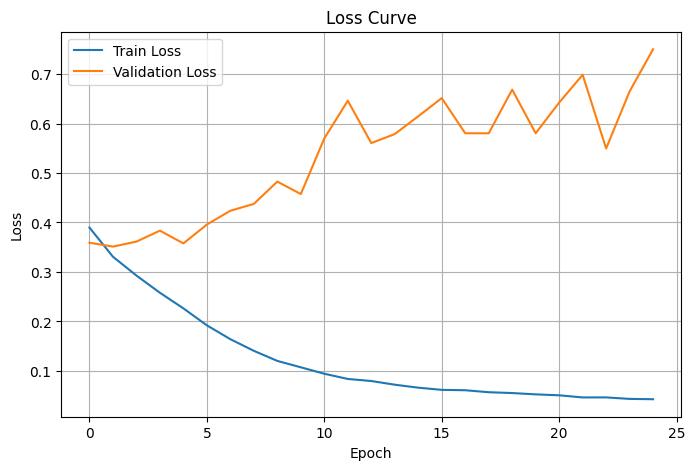

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.show()



Final Evaluation on Test Set:
Precision: 0.8513
Recall:    0.8514
F1 Score:  0.8513

Classification Report:
              precision    recall  f1-score   support

       Happy       0.91      0.90      0.91      8115
        Love       0.79      0.81      0.80      3615
     Sadness       0.79      0.80      0.79      1174
       Anger       0.65      0.65      0.65       574
        Fear       0.44      0.39      0.42       194

    accuracy                           0.85     13672
   macro avg       0.72      0.71      0.71     13672
weighted avg       0.85      0.85      0.85     13672



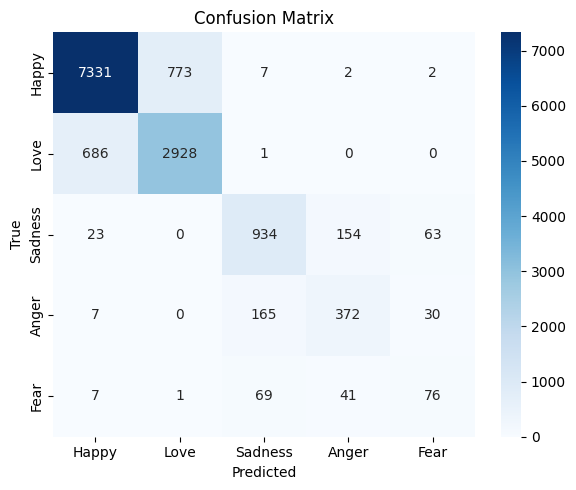

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        predictions = torch.argmax(outputs.logits, dim=1)
        labels = batch['labels']
        all_preds.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_true = np.array(all_labels)
y_pred = np.array(all_preds)

# Metrics
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print("\nFinal Evaluation on Test Set:")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_mapping.keys()))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_mapping.keys(),
            yticklabels=label_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()




In [ ]:
pip install shap transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [ ]:
print(type(background_texts))          # should be <class 'list'>
print(type(background_texts[0]))       # should be <class 'str'>




<class 'list'>
<class 'str'>


In [ ]:
print(dataframe.head())

  Emotion                                               text
0   Happy  Redmi 12C (4/128GB) [SEP] 5.0 [SEP] অসাধারণ ফো...
1   Happy  Redmi 12C (4/128GB) [SEP] 5.0 [SEP] Phone is g...
2    Love  Redmi 12C (4/128GB) [SEP] 5.0 [SEP] অল্প দামে ...
3   Happy  Redmi 12C (4/128GB) [SEP] 5.0 [SEP] Super Fast...
4   Happy  Redmi 12C (4/128GB) [SEP] 5.0 [SEP] Delay Deli...


In [ ]:
texts_to_explain = dataframe['text'].astype(str).sample(2, random_state=1).tolist()




In [ ]:
import shap
import torch
import pandas as pd
from transformers import BertTokenizer
import numpy as np


model.eval()

# Define prediction function for SHAP
def predict_proba(texts):
    # Ensure texts is a plain list of strings
    if isinstance(texts, np.ndarray):
        texts = texts.tolist()

    inputs = tokenizer.batch_encode_plus(
        texts,
        max_length=100,
        truncation=True,
        padding="max_length",
        return_tensors="pt"
    )
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = torch.nn.functional.softmax(logits, dim=1).cpu().numpy()
    return probs




# ✅ Sample background text and explanation targets from your dataframe
background_texts = dataframe['text'].astype(str).sample(20, random_state=42).tolist()
texts_to_explain = dataframe['text'].astype(str).sample(2, random_state=1).tolist()

# ✅ SHAP masker and explainer
masker = shap.maskers.Text(tokenizer)
explainer = shap.Explainer(predict_proba, masker)

# ✅ Generate SHAP values
shap_values = explainer(texts_to_explain)

# ✅ Visualize
shap.plots.text(shap_values[0])  # First text explanation




## **XLMRoberta**

In [ ]:
!pip install git+https://github.com/huggingface/transformers.git datasets

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-svd20ayf
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-svd20ayf
  Resolved https://github.com/huggingface/transformers.git to commit 716819b8309324302e00a3488a3c3d6faa427f79
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 5.7 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.52.0.dev0-py3-none-any.whl size=11264218 sha256=b7461f05922a401f7a1d29d5f1e9d0d7b54d7cf1ed0f37dca86d04969c9552df
  Stored in directory: /tmp/pip-ephem-wheel-cache-diq69lzw/wheels/32/4b/78/f195c684dd3a9ed21f3b39fe8f85b48df7918581b6437be143
Successfully built transformers
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Succes

In [ ]:
import pandas as pd
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, Dataset
from datasets import Dataset as HFDataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


dataframe = pd.read_csv("/kaggle/working/CSE475_Assingment2/dataset.csv")
dataframe["text"] = (
    dataframe["Product Name"] + " [SEP] " +
    dataframe["Rating"].astype(str) + " [SEP] " +
    dataframe["Review"] + " [SEP] " +
    dataframe["Product Category"] + " [SEP] " +
    dataframe["Data Source"] + " [SEP] " +
    dataframe["Sentiment"]
)

columns_to_remove = ['Rating', 'Product Name', 'Product Category', 'Data Source', 'Review', 'Sentiment']
dataframe = dataframe.drop(columns=columns_to_remove)
dataset_hf = HFDataset.from_pandas(dataframe)
label_mapping = {"Happy": 0, "Love": 1, "Sadness": 2, "Anger": 3, "Fear": 4}

def encode_labels(example):
    return {"label": label_mapping[example["Emotion"]]}

dataset_hf = dataset_hf.map(encode_labels)
dataset_hf = dataset_hf.remove_columns(["Emotion"])

split_dataset = dataset_hf.train_test_split(test_size=0.2, seed=42)
train_dataset = split_dataset["train"]
temp_dataset = split_dataset["test"]
temp_split = temp_dataset.train_test_split(test_size=0.125, seed=42)
test_dataset = temp_split["train"]
validation_dataset = temp_split["test"]


Map:   0%|          | 0/78130 [00:00<?, ? examples/s]

In [ ]:
class TextDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=128):
        self.encodings = tokenizer(data['text'], truncation=True, padding=True,
                                   max_length=max_length, return_tensors='pt')
        self.labels = torch.tensor(data['label'])

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
model_name = "xlm-roberta-large"
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification

tokenizer = XLMRobertaTokenizer.from_pretrained(model_name)
model = XLMRobertaForSequenceClassification.from_pretrained(model_name, num_labels=5)
# 7. Create DataLoaders
train_text_dataset = TextDataset(train_dataset, tokenizer)
val_text_dataset = TextDataset(validation_dataset, tokenizer)
test_text_dataset = TextDataset(test_dataset, tokenizer)

train_loader = DataLoader(train_text_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_text_dataset, batch_size=16)
test_loader = DataLoader(test_text_dataset, batch_size=16)

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
num_epochs = 25
early_stopping_patience = 3

train_losses, val_losses, val_accuracies = [], [], []
best_val_loss = float('inf')
stopping_counter = 0


In [ ]:
!pip install tqdm


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        optimizer.zero_grad()
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Validation step
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            val_loss += outputs.loss.item()
            predictions = torch.argmax(outputs.logits, dim=1)
            labels = batch['labels']
            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    avg_train_loss = total_loss / len(train_loader)
    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = correct / total

    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}: Train Loss={avg_train_loss:.4f}, Val Loss={avg_val_loss:.4f}, Val Acc={val_accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        stopping_counter = 0
    else:
        stopping_counter += 1
        if stopping_counter >= early_stopping_patience:
            print("Early stopping triggered.")
            break


Epoch 1: Train Loss=0.3813, Val Loss=0.3356, Val Acc=0.8516, Precision=0.8466, Recall=0.8516, F1=0.8465
Epoch 2: Train Loss=0.3369, Val Loss=0.3294, Val Acc=0.8557, Precision=0.8578, Recall=0.8557, F1=0.8560
Epoch 3: Train Loss=0.3112, Val Loss=0.3575, Val Acc=0.8506, Precision=0.8594, Recall=0.8506, F1=0.8493
Epoch 4: Train Loss=0.2884, Val Loss=0.3143, Val Acc=0.8649, Precision=0.8693, Recall=0.8649, F1=0.8614
Epoch 5: Train Loss=0.2717, Val Loss=0.3153, Val Acc=0.8649, Precision=0.8696, Recall=0.8649, F1=0.8645
Epoch 6: Train Loss=0.2566, Val Loss=0.3209, Val Acc=0.8772, Precision=0.8804, Recall=0.8772, F1=0.8771
Epoch 7: Train Loss=0.2436, Val Loss=0.3193, Val Acc=0.8669, Precision=0.8684, Recall=0.8669, F1=0.8667
Early stopping triggered.


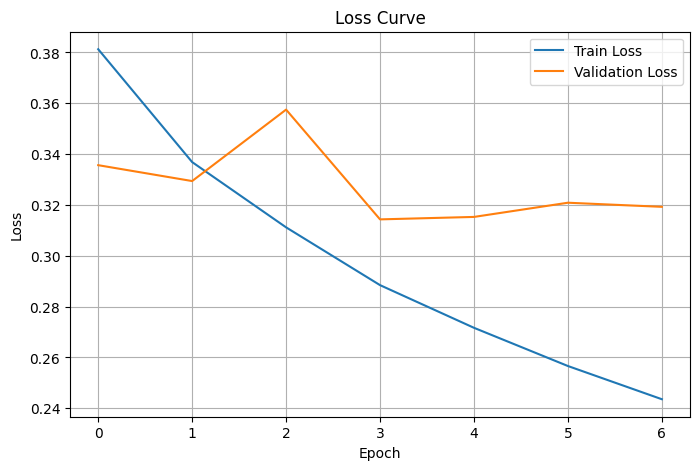

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.show()



Final Evaluation on Test Set:
Precision: 0.8719
Recall:    0.8695
F1 Score:  0.8703

Classification Report:
              precision    recall  f1-score   support

       Happy       0.93      0.90      0.92      8115
        Love       0.80      0.85      0.82      3615
     Sadness       0.86      0.83      0.84      1174
       Anger       0.70      0.75      0.73       574
        Fear       0.48      0.45      0.47       194

    accuracy                           0.87     13672
   macro avg       0.75      0.76      0.75     13672
weighted avg       0.87      0.87      0.87     13672



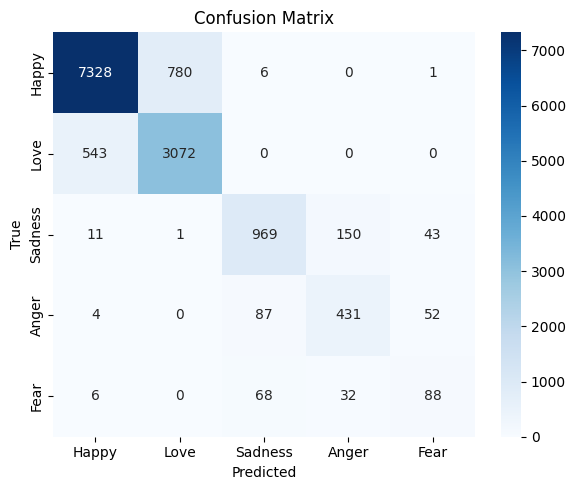

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        predictions = torch.argmax(outputs.logits, dim=1)
        labels = batch['labels']
        all_preds.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_true = np.array(all_labels)
y_pred = np.array(all_preds)

# Metrics
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print("\nFinal Evaluation on Test Set:")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_mapping.keys()))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_mapping.keys(),
            yticklabels=label_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()





In [ ]:
pip install shap transformers


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import shap
import torch
import pandas as pd
from transformers import BertTokenizer
import numpy as np


model.eval()

# Define prediction function for SHAP
def predict_proba(texts):
    # Ensure texts is a plain list of strings
    if isinstance(texts, np.ndarray):
        texts = texts.tolist()

    inputs = tokenizer.batch_encode_plus(
        texts,
        max_length=100,
        truncation=True,
        padding="max_length",
        return_tensors="pt"
    )
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = torch.nn.functional.softmax(logits, dim=1).cpu().numpy()
    return probs




# ✅ Sample background text and explanation targets from your dataframe
background_texts = dataframe['text'].astype(str).sample(20, random_state=42).tolist()
texts_to_explain = dataframe['text'].astype(str).sample(2, random_state=1).tolist()

# ✅ SHAP masker and explainer
masker = shap.maskers.Text(tokenizer)
explainer = shap.Explainer(predict_proba, masker)

# ✅ Generate SHAP values
shap_values = explainer(texts_to_explain)

# ✅ Visualize
shap.plots.text(shap_values[0])  # First text explanation





  0%|          | 0/498 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 3it [00:15, 15.49s/it]               
